In [2]:
import gym
import gym_snake
from q_learning_agent import Agent

import matplotlib.pyplot as plt
import numpy as np

Q-learning agent v0.0.1


In [3]:
def observation2state(observation):
    '''
    observation = (X, Y, x, y) => state number
    '''
    d = env.dim # размер поля (6)
    X = observation[0]
    Y = observation[1]
    x = observation[2]
    y = observation[3]
    return y + d*(x + d*(Y + X*d)) 
   
def plot_learning_curves(scores, scores_100):
    eps = [i*10 for i in range(len(scores))]
    plt.plot(eps, scores, label='очки')
    plt.plot(eps, scores_100, label='среднее за 100')
    plt.xlabel('Эпизоды')
    plt.ylabel('Набрано очков')
    plt.grid()
    plt.legend()
    plt.title('Кривая обучения агента Snake-v0')
    plt.show()
    

In [4]:
env = gym.make('Snake-v0')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01,
              eps_dec=0.9999996, n_actions=4, n_states=env.dim**4, rand=True)

Обучение 

episode 0 mean score -77.00 epsilon 1.00
episode 1000 mean score -34.87 epsilon 0.92
episode 2000 mean score 48.77 epsilon 0.85
episode 3000 mean score 78.58 epsilon 0.79
episode 4000 mean score 113.10 epsilon 0.73
episode 5000 mean score 157.30 epsilon 0.67
episode 6000 mean score 187.63 epsilon 0.62
episode 7000 mean score 188.77 epsilon 0.57
episode 8000 mean score 240.13 epsilon 0.53
episode 9000 mean score 237.86 epsilon 0.49
episode 10000 mean score 323.31 epsilon 0.45
episode 11000 mean score 329.96 epsilon 0.42
episode 12000 mean score 366.28 epsilon 0.39
episode 13000 mean score 441.80 epsilon 0.36
episode 14000 mean score 468.72 epsilon 0.33
episode 15000 mean score 507.38 epsilon 0.30
episode 16000 mean score 556.91 epsilon 0.28
episode 17000 mean score 549.85 epsilon 0.26
episode 18000 mean score 570.96 epsilon 0.24
episode 19000 mean score 603.57 epsilon 0.22
episode 20000 mean score 595.23 epsilon 0.20
episode 21000 mean score 574.17 epsilon 0.19
episode 22000 mean score 

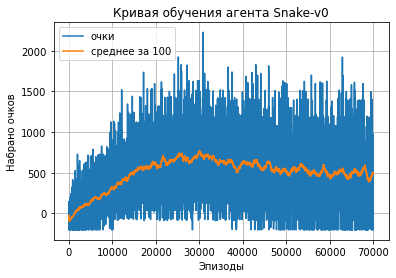

Wall time: 27min 52s


In [5]:
%%time

scores = []
scores_100 = []
n_games = 70000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        state = observation2state(observation)
        action = agent.choose_action(state)
        observation_, reward, done, info = env.step(action)
        state_ = observation2state(observation_)
        agent.learn(state, action, reward, state_)
        score += reward
        observation = observation_
    if i % 10 == 0:
        scores.append(score)
        mean_score = np.mean(scores[-100:])
        scores_100.append(mean_score)
        if i % 1000 == 0:
            print('episode %d mean score %.2f epsilon %.2f' % (i, mean_score, agent.epsilon))
plot_learning_curves(scores, scores_100)

Тестирование

In [6]:
observation = env.reset()
print(observation)
done = False
score = 0
steps = 0
while not done:
    env.render()
    state = observation2state(observation)
    action = agent.choose_action(state)
    observation, reward, done, info = env.step(action)
    score += reward
    steps += 1
    print("step %d action %d => %d, total: %d" % (steps, action, reward, score))
print("End of episode")

(0, 0, 4, 1)
O . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. A . . . . 
. . . . . . 
step 1 action 3 => -1, total: -1
. . . . . . 
O . . . . . 
. . . . . . 
. . . . . . 
. A . . . . 
. . . . . . 
step 2 action 2 => -1, total: -2
. . . . . . 
. O . . . . 
. . . . . . 
. . . . . . 
. A . . . . 
. . . . . . 
step 3 action 3 => -1, total: -3
. . . . . . 
. . . . . . 
. O . . . . 
. . . . . . 
. A . . . . 
. . . . . . 
step 4 action 3 => -1, total: -4
. . . . . . 
. . . . . . 
. . . . . . 
. O . . . . 
. A . . . . 
. . . . . . 
step 5 action 3 => 100, total: 96
. . . . . . 
. . . . . . 
. . . . . . 
. o . . . . 
. O . . . . 
. . . . A . 
step 6 action 3 => -1, total: 95
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. o . . . . 
. O . . A . 
step 7 action 2 => -1, total: 94
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. o O . A . 
step 8 action 2 => -1, total: 93
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . o O A . 
step 9 action 2 => 1

. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 90 action 2 => -2, total: 554
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 91 action 2 => -2, total: 552
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 92 action 2 => -2, total: 550
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 93 action 2 => -2, total: 548
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 94 action 2 => -2, total: 546
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 95 action 2 => -2, total: 544
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 96 action 2 => -2, total: 542
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 97 action 2 => -2, total: 540
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 98 action 2 => -2, total: 538
. . . . .

. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 183 action 2 => -2, total: 368
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 184 action 2 => -2, total: 366
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 185 action 2 => -2, total: 364
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 186 action 2 => -2, total: 362
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 187 action 2 => -2, total: 360
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 188 action 2 => -2, total: 358
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 189 action 2 => -2, total: 356
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 190 action 2 => -2, total: 354
. . . . . . 
. . O o o o 
. . . A . o 
. . . . . o 
. . . . o o 
. . . . . . 
step 191 action 2 => -2, total: 352
